In [72]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

In [74]:
img=cv2.imread('/home/taibui/Pictures/me.jpg',0)
#img=cv2.imshow('abc',img)
#cv2.waitKey(0)

height, width =img.shape[:2]
img = cv2.resize(img, (425, 425), interpolation = cv2.INTER_AREA)
cv2.imwrite('tai.jpg', img)


True

In [4]:
#img=cv2.imshow('abc',img)
#cv2.waitKey(0)

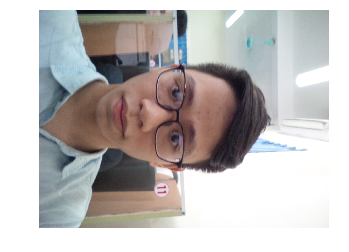

In [5]:
img=mpimg.imread('/home/taibui/Pictures/me.jpg')
plt.imshow(img)

plt.axis('off')
plt.show()

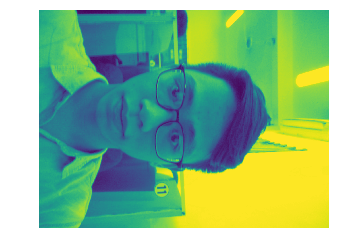

In [6]:
gray=0.2125*img[:,:,0]+0.7154*img[:,:,1]+0.0721*img[:,:,2]
plt.imshow(gray)
plt.axis('off')
plt.show()

In [7]:
from numpy import linalg as LA 
U, S, V = LA.svd(gray)

In [14]:
print S

[  2.36130627e+05   4.05823181e+04   2.64332447e+04 ...,   2.09646483e+00
   2.06969428e+00   1.97720018e+00]


In [25]:

def appr_rank_k(U,S,V,k):
    Uk=U[:,:k]
    Sk=S[:k]
    Vk=V[:k,:]
    return np.around(Uk.dot(np.diag(Sk)).dot(Vk)) # lam tron 

A1=[]
for k in xrange(5,100,5):
    A1.append(appr_rank_k(U,S,V,k))
    

In [28]:
print A1[1]

[[ 146.  145.  146. ...,  169.  168.  168.]
 [ 146.  146.  146. ...,  169.  169.  168.]
 [ 147.  147.  147. ...,  168.  168.  168.]
 ..., 
 [ 141.  141.  141. ...,  240.  239.  239.]
 [ 141.  141.  141. ...,  240.  240.  239.]
 [ 142.  141.  142. ...,  240.  240.  239.]]


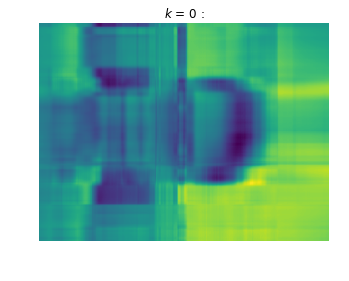

In [27]:
import matplotlib.animation as animation 
from matplotlib.animation import FuncAnimation 
fig,ax=plt.subplots()

def update(i):
    ani=plt.cla()  # Clear the current axes.
    ani=plt.imshow(A1[i])
    label ='$k$ = %d :' %(5*i)
    ax.set_xlabel(label)
    ani = plt.axis('off')
    ani = plt.title(label)

    return ani, ax 

anim = FuncAnimation(fig, update, frames=np.arange(0, len(A1)), interval=500)
anim.save('a.gif', dpi = 300, writer = 'imagemagick')
plt.show()
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

In [2]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

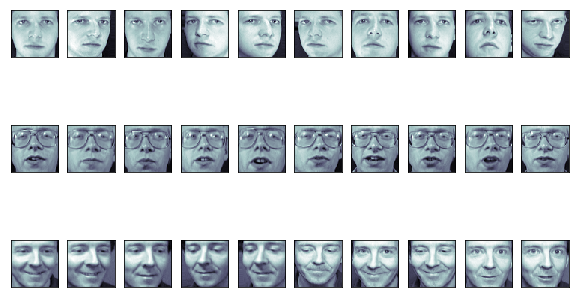

In [24]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 6))
# plot several images
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)


((300, 4096), (100, 4096))


In [19]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=100, whiten=True)
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

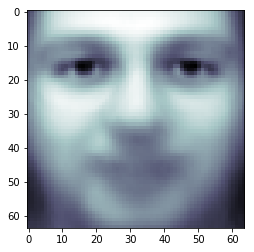

(100, 4096)


In [20]:
# computes the "mean" face

plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)
plt.show()
print(pca.components_.shape)

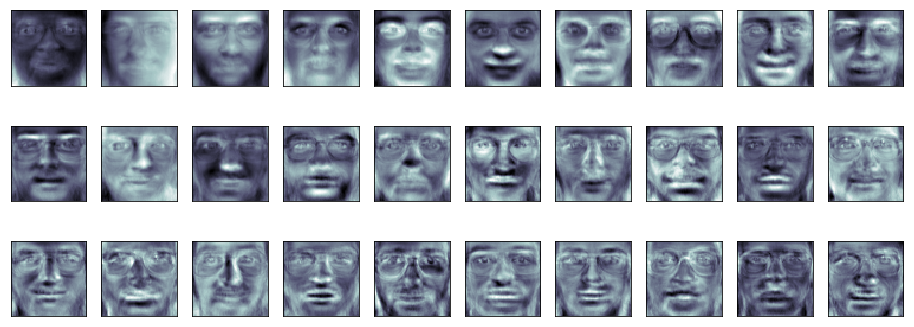

In [25]:
# It is also interesting to visualize these principal components:

fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
plt.show()

In [26]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 100)
(100, 100)


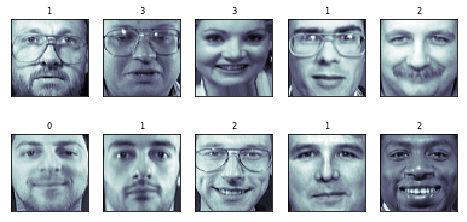

In [27]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.01)
clf.fit(X_train_pca, y_train)



import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(10):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)
plt.show()

In [15]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

print(metrics.confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.50      0.67         6
          1       1.00      0.75      0.86         4
          2       0.50      0.50      0.50         2
          3       0.33      1.00      0.50         1
          4       0.50      1.00      0.67         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         16       0.00      0.00      0.00         0
         17       1.00      0.67      0.80         6
         19       1.00      1.00      1.00   

/home/taibui/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [49]:
import matplotlib.pyplot as plt 
import numpy as np  
from PIL import Image  #PIL to read all kind of images
import glob

In [50]:
def displaying_faces_grid(displaying_faces):
    size=100, 100
    #fig1=plt.figure('name')
    fig1, axes_array = plt.subplots(5, 5)
    fig1.set_size_inches(5,5)
    count=0
    for x in range(5):
        for y in range (5):
            #if images are taken
            draw_image = displaying_faces[count]
            draw_image.thumbnail(size)
            draw_image= np.asarray(draw_image,dtype=float)/255.0
           
            image_plot=axes_array[x][y].imshow(draw_image,cmap=plt.cm.gray)
            axes_array[x][y].axis('off')
            count=count+1
    fig1.canvas.set_window_title('Displaying all faces')
    plt.show()

In [51]:
def display_mean_face(face_array):
    mean = np.mean(face_array, 0)
    fig2, axes_array = plt.subplots(1, 1)
    fig2.set_size_inches(5, 5)
    image_plot = axes_array.imshow(mean, cmap=plt.cm.gray)
    fig2.canvas.set_window_title('mean faces')
    plt.show()
    return mean

In [52]:
def performing_pca(face_array):
    print("MEAN FACE DISPLAY")
    mean = display_mean_face(face_array)
    # flattening array
    flatten_Array = []
    for x in range(len(face_array)):
        flat_Array = face_array[x].flatten()
        flatten_Array.append(flat_Array)
    flatten_Array = np.asarray(flatten_Array)
    mean = mean.flatten()
  
    return mean,flatten_Array,

In [53]:
def display_all(images):
    fig3, axes_array = plt.subplots(5, 5)
    fig3.set_size_inches(5, 5)
    count = 0
    for x in range(5):
        for y in range(5):
            draw_image = images[count]
            image_plot = axes_array[x][y].imshow(draw_image, cmap=plt.cm.gray)
            axes_array[x][y].axis('off')
            count = count + 1
    fig3.canvas.set_window_title('Eigen Faces')
    plt.show()

In [54]:
def reading_faces_and_displaying():
    face_array = []
    displaying_faces = []
    for face_images in glob.glob('/home/taibui/OpenCV/code/Eigenfaces/Train/*.jpg'): # assuming jpg
        face_image=Image.open(face_images)
        displaying_faces.append(face_image)
        face_image = np.asarray(face_image,dtype=float)/255.0
        face_array.append(face_image)
    print("DISPLAYING ORIGINAL FACES")
    displaying_faces_grid(displaying_faces)
    face_array=np.asarray(face_array)
    return face_array

DISPLAYING ORIGINAL FACES


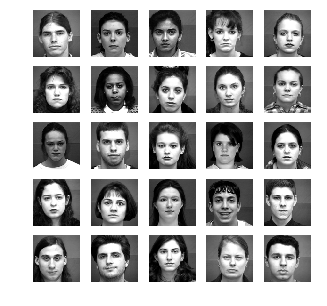

MEAN FACE DISPLAY


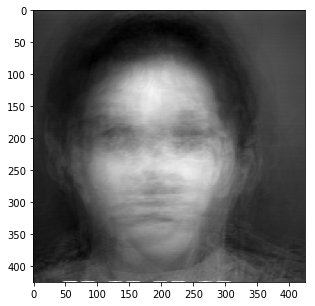

EIGEN FACES


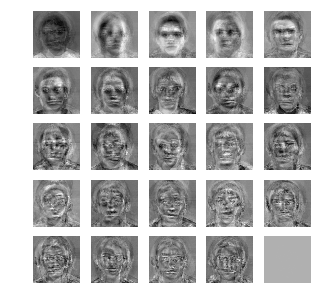

In [59]:
"""TASK 1"""
face_array=reading_faces_and_displaying()
mean,flatten_Array=performing_pca(face_array) # eigen_values,eigen_vectors
substract_mean_from_original = np.subtract(flatten_Array, mean)
U, s, V = np.linalg.svd(substract_mean_from_original, full_matrices=False)
Eigen_faces=[]

for x in range(V.shape[0]):
    fig=np.reshape(V[x],(425,425))
    Eigen_faces.append(fig)
print("EIGEN FACES")
display_all(Eigen_faces)


In [66]:
"TASK 2"

def display_reconstruction(images):
    fig4, axes_array = plt.subplots(5, 5)
    fig4.set_size_inches(5, 5)
    count = 0
    for x in range(5):
        for y in range(5):
            draw_image = np.reshape(images[count, :], (425, 425))
            image_plot = axes_array[x][y].imshow(draw_image, cmap=plt.cm.gray)
            axes_array[x][y].axis('off')
            count = count + 1
    fig4.canvas.set_window_title('Reconstructed faces for k=' + str(k))
    plt.show()

RECONSTRUCTING FACES FOR K=2


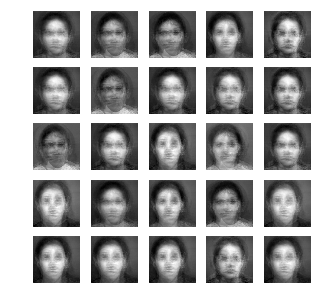

RECONSTRUCTING FACES FOR K=5


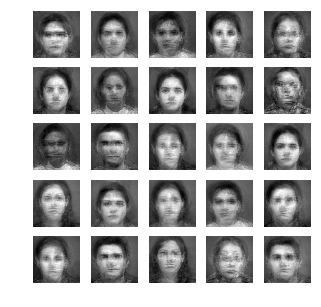

RECONSTRUCTING FACES FOR K=15


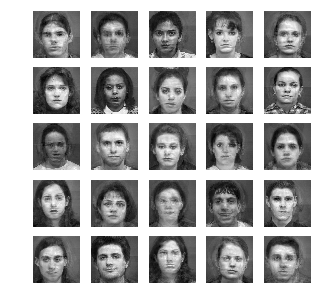

RECONSTRUCTING FACES FOR K=25


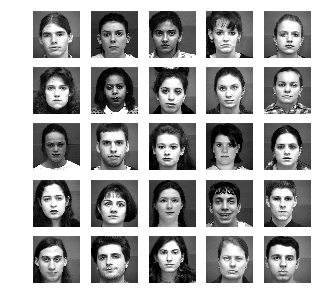

In [67]:
def reconstructing_faces(k, mean, substract_mean_from_original, V):
    weights = np.dot(substract_mean_from_original, V.T)
    reconstruction = mean + np.dot(weights[:, 0:k], V[0:k, :])
    display_reconstruction(reconstruction)
k = 2
print("RECONSTRUCTING FACES FOR K=2")
reconstructing_faces(k, mean, substract_mean_from_original, V)
k = 5
print("RECONSTRUCTING FACES FOR K=5")
reconstructing_faces(k, mean, substract_mean_from_original, V)
k = 15
print("RECONSTRUCTING FACES FOR K=15")
reconstructing_faces(k, mean, substract_mean_from_original, V)
k=25
print("RECONSTRUCTING FACES FOR K=25")
reconstructing_faces(k,mean,substract_mean_from_original,V)


In [75]:
"""TASK 3"""

def class_face(k,test_from_mean,test_flat_images,V,substract_mean_from_original,face_array):
    
    eigen_weights = np.dot(V[:k, :],substract_mean_from_original.T)
    
    threshold = 3000
    for i in range(test_from_mean.shape[0]):
        test_weight = np.dot(V[:k, :],test_from_mean[i:i + 1,:].T)
        
        distances_euclidian = np.sum((eigen_weights - test_weight) ** 2, axis=0)
        image_closest = np.argmin(np.sqrt(distances_euclidian))
       
        fig, axes_array = plt.subplots(1, 2)
        fig.set_size_inches(5, 5)
        to_plot=np.reshape(test_flat_images[i,:], (425,425))
        axes_array[0].imshow(to_plot, cmap=plt.cm.gray)
        axes_array[0].axis('off')
        
        if (distances_euclidian[image_closest] <= threshold):
            axes_array[1].imshow(face_array[image_closest,:,:], cmap=plt.cm.gray)
        axes_array[1].axis('off')
        
    plt.show()

In [76]:
def returning_vector(test_images):
    flat_test_Array = []
    for x in range(len(test_images)):
        flat_Array = test_images[x].flatten()
        flat_test_Array.append(flat_Array)
    flat_test_Array = np.asarray(flat_test_Array)
    return flat_test_Array

def reading_test_images():
    test_images=[]
    for images in glob.glob('/home/taibui/OpenCV/code/Eigenfaces/Test/*.jpg'): 
        test_faces = Image.open(images)
        test_faces = np.asarray(test_faces, dtype=float) / 255.0
       
        test=(425,425,3)
        if test_faces.shape == test:
            test_faces=test_faces[:,:,0]
            test_images.append(test_faces)
        else:
            test_images.append(test_faces)
    print(len(test_images))
   
    flat_test_Array=returning_vector(test_images)
    test_images=np.asarray(test_images)
    return flat_test_Array,test_images

33
FACES FOR K=2


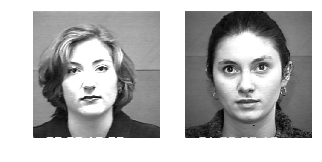

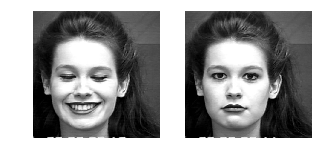

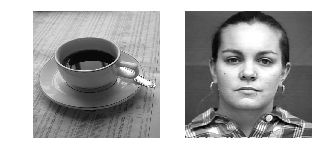

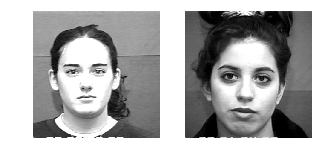

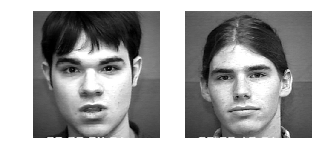

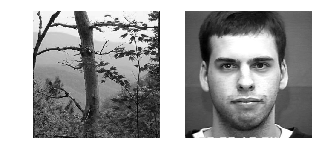

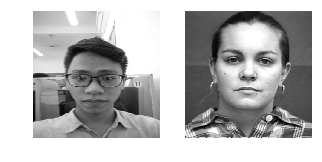

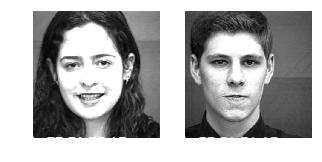

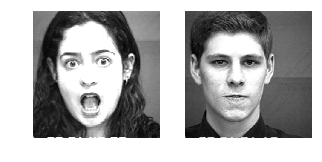

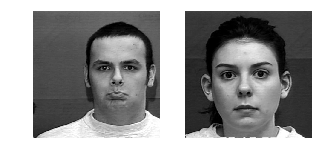

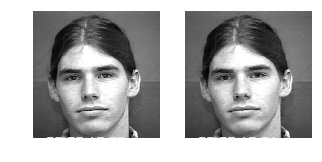

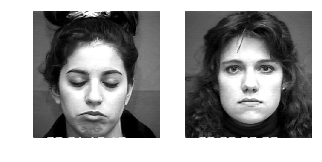

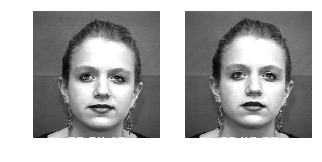

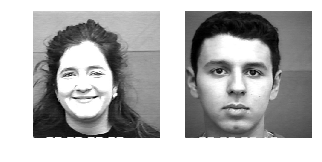

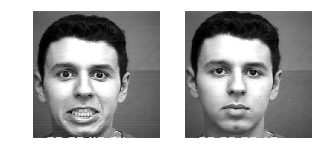

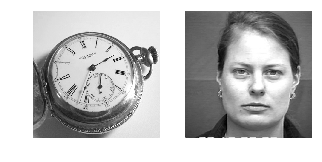

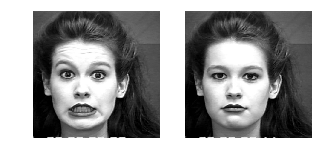

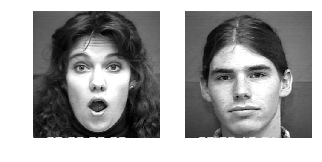

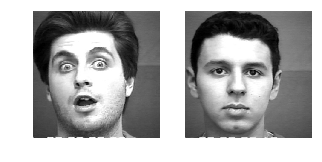

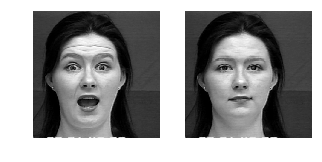

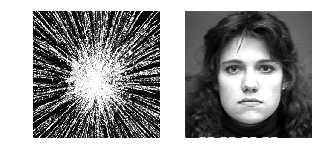

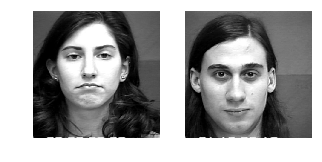

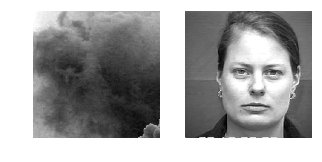

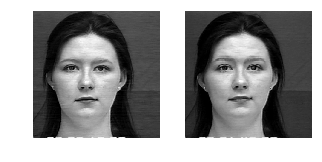

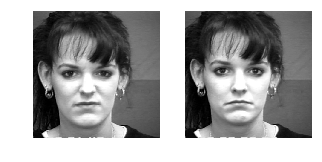

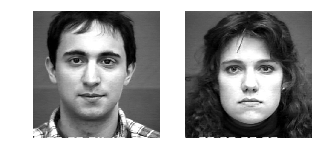

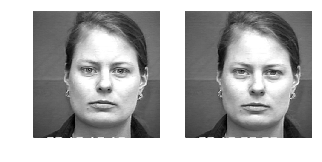

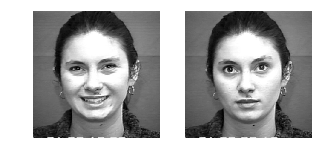

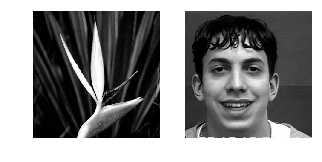

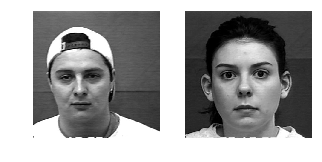

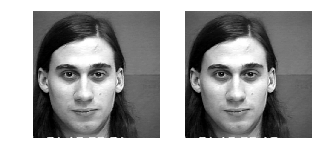

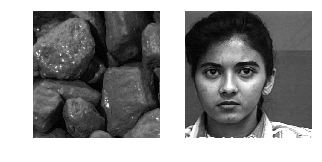

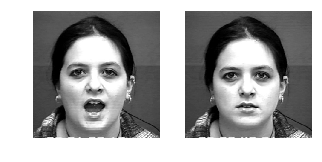

FACES FOR K=5


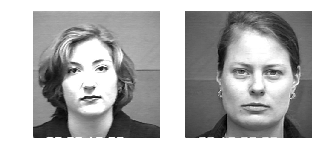

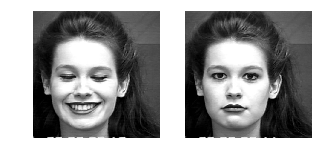

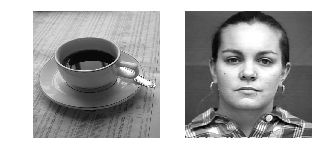

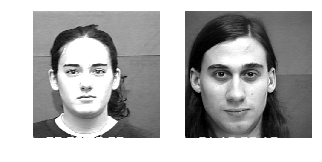

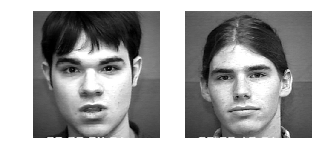

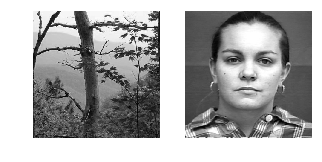

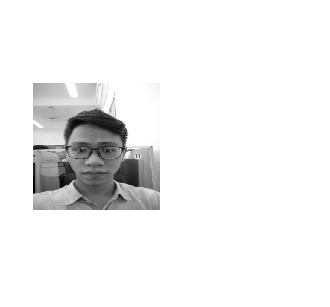

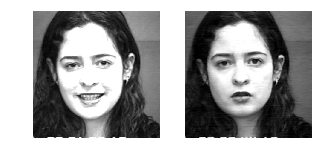

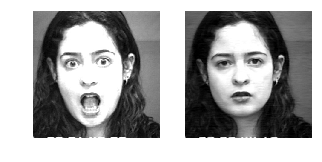

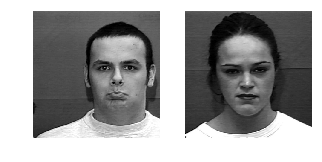

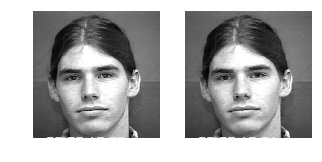

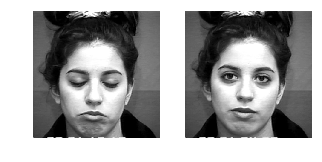

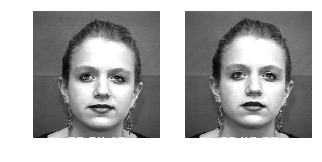

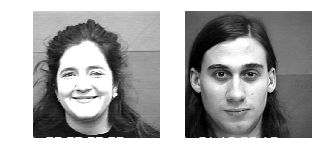

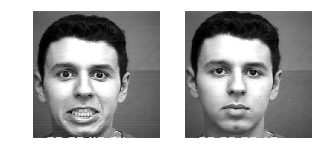

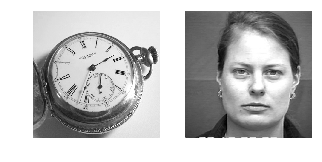

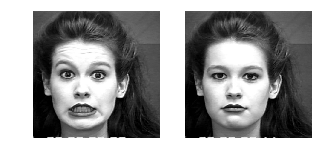

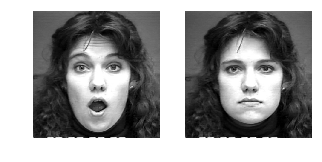

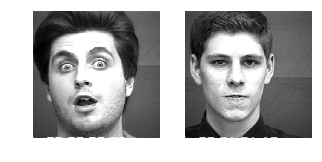

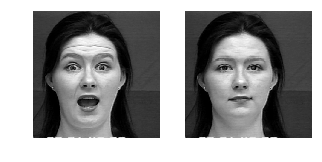

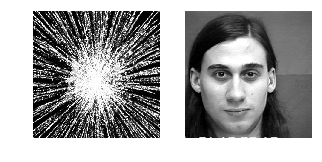

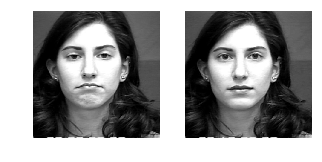

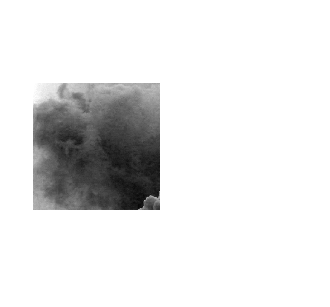

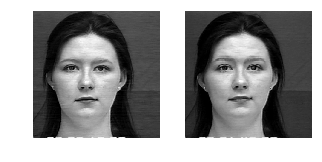

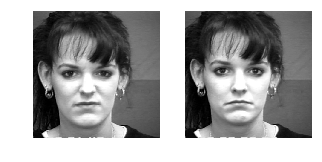

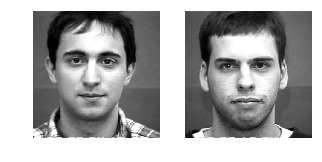

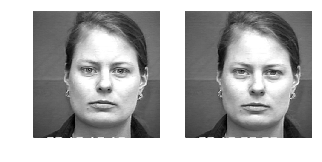

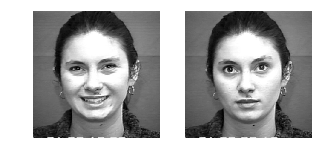

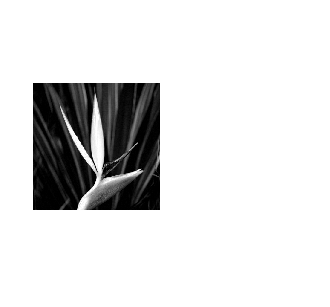

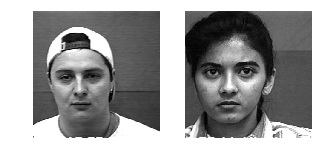

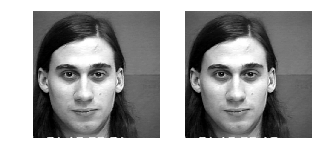

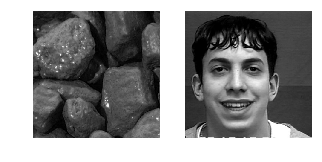

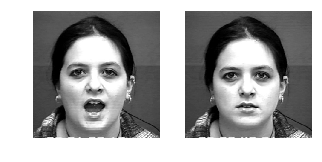

FACES FOR K=15


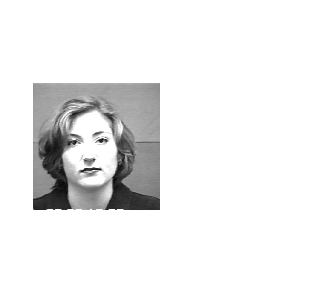

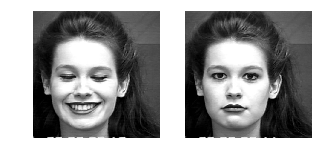

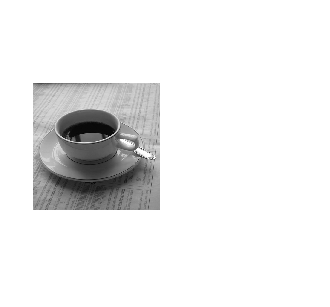

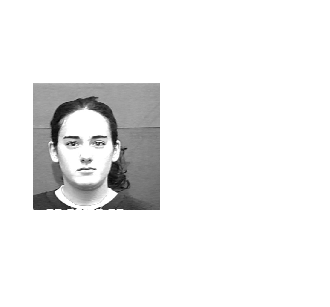

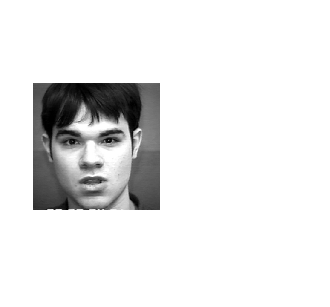

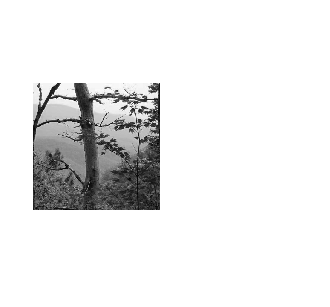

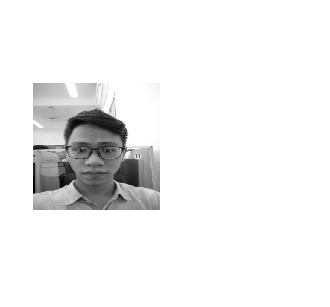

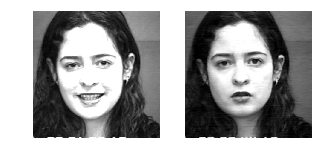

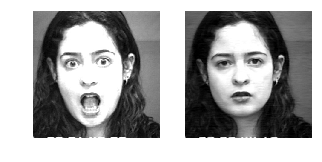

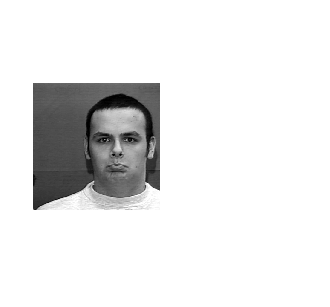

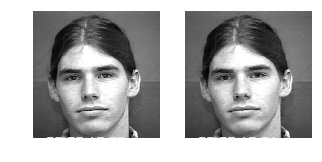

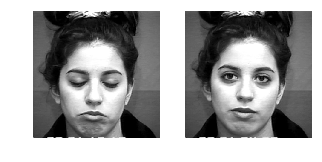

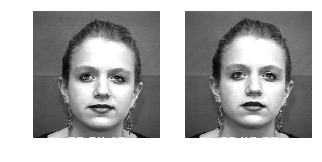

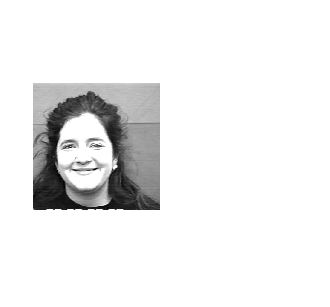

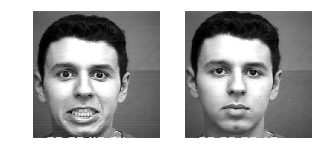

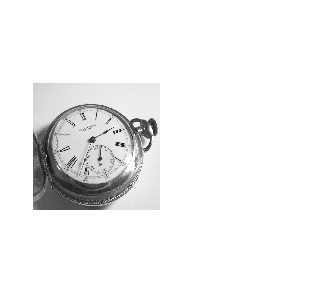

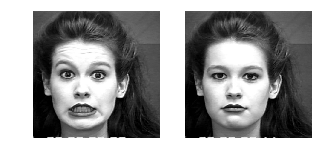

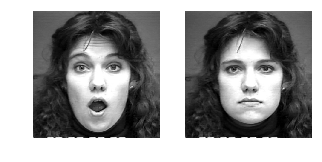

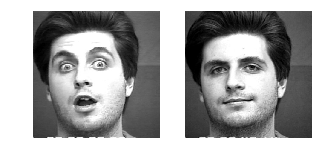

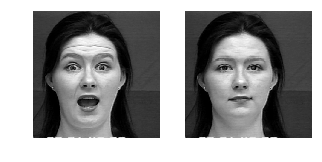

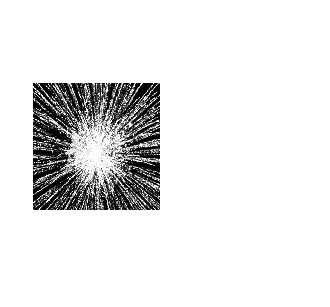

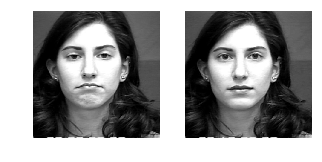

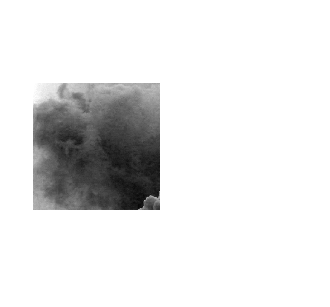

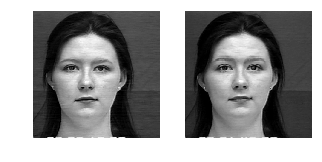

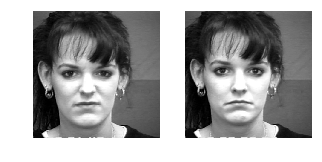

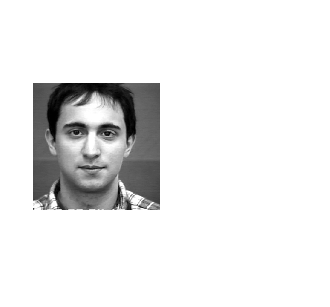

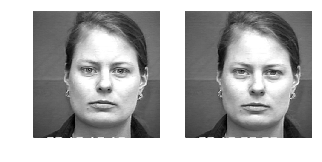

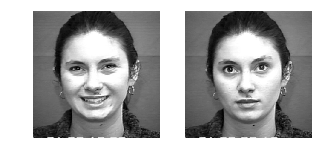

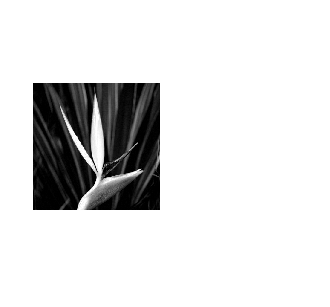

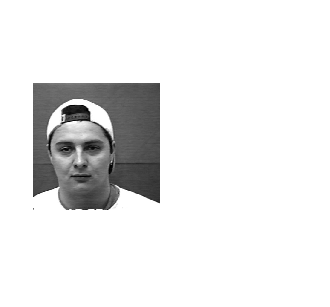

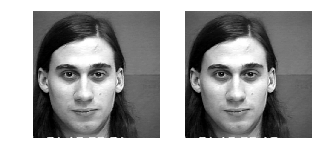

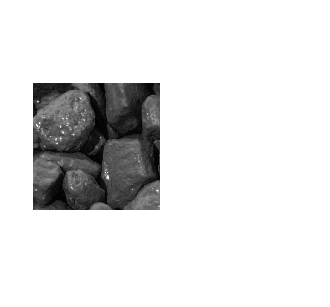

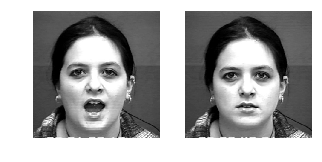

In [77]:
test_flat_images,test_images=reading_test_images()
test_from_mean=np.subtract(test_flat_images,mean)

k=2
print("FACES FOR K=2")
class_face(k,test_from_mean,test_flat_images,V,substract_mean_from_original,face_array)
k=5
print("FACES FOR K=5")
class_face(k,test_from_mean,test_flat_images,V,substract_mean_from_original,face_array)
k=15
print("FACES FOR K=15")
class_face(k,test_from_mean,test_flat_images,V,substract_mean_from_original,face_array)


In [78]:
"""TASK 4"""
def error_for_k(k,test_from_mean,V,substract_mean_from_original,train_list,test_list):
    count=0
    eigen_weights = np.dot(V[:k, :],substract_mean_from_original.T)
    threshold = 6000
    for x in range(test_from_mean.shape[0]):
        test_weight = np.dot(V[:k, :],test_from_mean[x:x + 1,:].T)
        distances_euclidian = np.sum((eigen_weights - test_weight) ** 2, axis=0)
        image_closest = np.argmin(np.sqrt(distances_euclidian))
        x=test_list[x]
        z=int(x[1:])
        if (distances_euclidian[image_closest] <= threshold):
            y=train_list[image_closest]
        else:
            y=0

        if (x == y) or (z < 89 and y == 0):
            count = count
        else:
            count = count + 1
    #print(k_image_and_prediction)

    error_rate=count/len(test_list)*100
    return error_rate,count


In [79]:
train_list=[]
for images in glob.glob('/home/taibui/OpenCV/code/Eigenfaces/Train/*.jpg'):
    a1=images
    _,a1 = a1.split('//')
    #a1,_=a1.split('')
    a1,_=a1.split('_', maxsplit=1)
    train_list.append(a1)
train_array=np.asarray(train_list)
print("TRAIN IMAGES")
print(train_)
test_list=[]
for images in glob.glob('/home/taibui/OpenCV/code/Eigenfaces/Test/*.jpg'):
    a1=images
    _,a1 = a1.split('\\')
    a1,_=a1.split('_', maxsplit=1)
    test_list.append(a1)
test_array=np.asarray(test_list)
print("TEST IMAGES ")
print(test_list)
errorrate_list=[]
k_value=[]
count_list=[]
for k in range(25):
    error_rate,count=error_for_k(k,test_from_mean,V,substract_mean_from_original,train_list,test_list)
    errorrate_list.append(error_rate)
    count_list.append(count)
    k_value.append(k)

plt.plot(np.array(k_value),np.array(errorrate_list),'ro')
plt.plot(np.array(k_value),np.array(errorrate_list),'b')
plt.axis()
plt.show()


ValueError: need more than 1 value to unpack

data size:
(400, 4096)
calculating covariance matrix...
calculating eigen vectors and values...
transforming to new space...


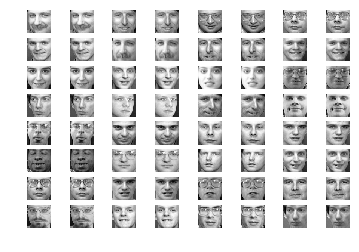

In [80]:
from sklearn.datasets import fetch_olivetti_faces
from scipy import linalg as la
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage 
import math

def cov(X):
    print("calculating covariance matrix...")
    mult = np.dot(X.T, X)
    return mult / X.shape[0]

def PCA (data, d = 100):
    print("data size:")
    print(data.shape)
    mean = data.mean(axis=0)
    data = data - mean
    R = cov(data)

    print("calculating eigen vectors and values...")
    evals, evecs = la.eigh(R)
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:, idx]
    evals = evals[idx]

    print("transforming to new space...")
    evecs = evecs[:, :d]
    trans = np.dot(data, evecs)
    recon = np.dot(trans, evecs.T) + mean

    return trans, recon

def Plot(data, recon, rows=5, cols=2):
    fig = plt.figure()    
    plt.set_cmap('gray')

    for row in range(0, rows):
        for col in range(0, cols):
            idx = np.random.randint(0, data.shape[0])
            img_before = np.reshape(data[idx], (64, 64))
            img_after = np.reshape(recon[idx], (64, 64))
            idx = row * cols * 2 + col * 2
            fig.add_subplot(rows, cols*2, idx + 1)
            plt.axis('Off')
            plt.imshow(img_before)
            fig.add_subplot(rows, cols*2, idx + 2)
            plt.axis('Off')
            plt.imshow(img_after)

    plt.show()



dataset = fetch_olivetti_faces(shuffle=True)
data, labels = dataset.data, dataset.target

trans, recon = PCA(data, 20*20)

Plot(data, recon, 8, 4)